In [37]:
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geopy.geocoders import Nominatim

## Geotagging the scraped Data

In [38]:
df = pd.read_csv('all_reviews.csv')
locations_df = pd.read_csv('locations_geotagged.csv')

In [39]:
df

,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name
0,St. Peter's Ruby Red Ale,3.3,"Bungay, Suffolk",St. Peter's Brewery,"Ruby color, offwhite coam. Aroma and taste: fl...",alex_leit
1,Shepherd Neame Spitfire (Bottle),2.2,"Faversham, Kent",Shepherd Neame,Disappointing show from the lads at ‘Britain’s...,shivermetimber.gray
2,Arbor Rocketman,3.8,"Bristol, Gloucestershire",Arbor Ales,"Puszka. Mętne o żółtym kolorze. Piana biała,ob...",MarcinG
3,Shepherd Neame India Pale Ale (Bottle),3.4,"Faversham, Kent",Shepherd Neame,Bottle. Amber with bronze color and white foam...,alex_leit
4,Shepherd Neame Christmas Ale,3.3,"Faversham, Kent",Shepherd Neame,Bottle. Aroma: English hops and malts with tof...,alex_leit
...,...,...,...,...,...,...
20785,Four Loko Sour Apple,3.1,+1.2,Drink Four Brewing Company ( Phusion Projects),Very light green jolly rancher smell with a to...,geologyguy
20786,Dunedin Biere de Cafe (Coffee Brown),1.7,-1.7,Dunedin Brewery,"Draft at the brewery. Brown body, small beige ...",Tranquillity
20787,Wychwood Hobgoblin IPA (Keg and Bottle),5.0,+1.8,Wychwood Brewery (Marston's),İçimi kolay ve zengin aromalı güzel bir İngili...,purikss
20788,Fuller's Black Cab Stout (Pasteurised),5.0,+1.5,Fuller's Brewery (Asahi),Stout bira severler için özellikle fıcı altern...,purikss


In [40]:
locations_df

,locations,latitude,longitude,country
0,"Bungay, Suffolk",52.456225,1.437341,United Kingdom
1,"Faversham, Kent",51.314409,0.891189,United Kingdom
2,"Bristol, Gloucestershire",51.852767,-2.255369,United Kingdom
3,"Round Rock, Texas",30.508235,-97.678893,United States of America
4,"Brooklyn, New York",40.650104,-73.949582,United States of America
...,...,...,...,...
2016,"King’s Bromley, Staffordshire",52.748947,-1.821020,United Kingdom
2017,"Dunsden, Oxfordshire",51.488146,-0.937114,United Kingdom
2018,"Bideford, Devon",51.010765,-4.199479,United Kingdom
2019,"St. Marys, Pennsylvania",41.428043,-78.561127,United States of America


In [41]:
geolocator = Nominatim(user_agent="None")

In [42]:
locations_new = pd.DataFrame(df.brewery_location[~df.brewery_location.isin(locations_df.locations)].unique(),columns=['locations'])
print(len(locations_new), "new locations to search for!")

0 new locations to search for!


In [43]:
def tryconvert(x):
        try:
            return geolocator.geocode(x).latitude
        except:
            return None
    

In [44]:
def tryconvertlong(x):
        try:
            return geolocator.geocode(x).longitude
        except:
            return None

In [45]:
locations_new["latitude"] = locations_new.locations.apply(lambda x: tryconvert(x))

In [46]:
locations_new["longitude"] = locations_new.locations.apply(lambda x: tryconvertlong(x))

In [47]:
locations_new

,locations,latitude,longitude


In [48]:
countries = []
for row in locations_new.index:
    try:
        loc = geolocator.reverse([locations_new.iloc[row,1],locations_new.iloc[row,2]], language='en')
        countries.append(loc.raw['address']['country'])
    except:
        countries.append(None)
        
    

In [49]:
locations_new['country'] = countries

In [50]:
locations_new

,locations,latitude,longitude,country


In [52]:
locations_df = pd.concat([locations_df,locations_new])
locations_df.to_csv('locations_geotagged.csv',index=False)

## Deal with Non-English Descriptions

## EDA

In [75]:
# Creating DF with all details
df_all = pd.merge(df,locations_df,how='left',left_on='brewery_location',right_on='locations')
df_all = pd.merge(df_all, 

,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name,locations,latitude,longitude,country
0,St. Peter's Ruby Red Ale,3.3,"Bungay, Suffolk",St. Peter's Brewery,"Ruby color, offwhite coam. Aroma and taste: fl...",alex_leit,"Bungay, Suffolk",52.456225,1.437341,United Kingdom
1,Shepherd Neame Spitfire (Bottle),2.2,"Faversham, Kent",Shepherd Neame,Disappointing show from the lads at ‘Britain’s...,shivermetimber.gray,"Faversham, Kent",51.314409,0.891189,United Kingdom
2,Arbor Rocketman,3.8,"Bristol, Gloucestershire",Arbor Ales,"Puszka. Mętne o żółtym kolorze. Piana biała,ob...",MarcinG,"Bristol, Gloucestershire",51.852767,-2.255369,United Kingdom
3,Shepherd Neame India Pale Ale (Bottle),3.4,"Faversham, Kent",Shepherd Neame,Bottle. Amber with bronze color and white foam...,alex_leit,"Faversham, Kent",51.314409,0.891189,United Kingdom
4,Shepherd Neame Christmas Ale,3.3,"Faversham, Kent",Shepherd Neame,Bottle. Aroma: English hops and malts with tof...,alex_leit,"Faversham, Kent",51.314409,0.891189,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
20785,Four Loko Sour Apple,3.1,+1.2,Drink Four Brewing Company ( Phusion Projects),Very light green jolly rancher smell with a to...,geologyguy,+1.2,48.960138,2.367273,France
20786,Dunedin Biere de Cafe (Coffee Brown),1.7,-1.7,Dunedin Brewery,"Draft at the brewery. Brown body, small beige ...",Tranquillity,-1.7,48.780313,10.039726,Germany
20787,Wychwood Hobgoblin IPA (Keg and Bottle),5.0,+1.8,Wychwood Brewery (Marston's),İçimi kolay ve zengin aromalı güzel bir İngili...,purikss,+1.8,48.780981,10.037026,Germany
20788,Fuller's Black Cab Stout (Pasteurised),5.0,+1.5,Fuller's Brewery (Asahi),Stout bira severler için özellikle fıcı altern...,purikss,+1.5,52.583680,13.276599,Germany


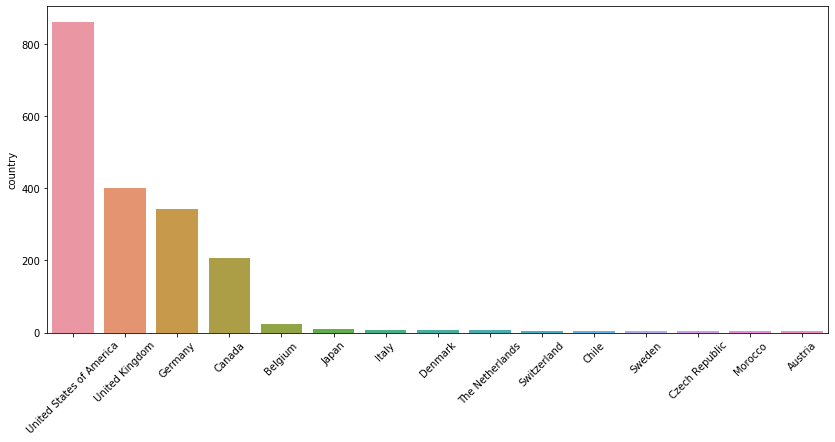

In [69]:
# Where the beers are from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=locations_df.country.value_counts().head(15).index,y=locations_df.country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

KeyboardInterrupt: 

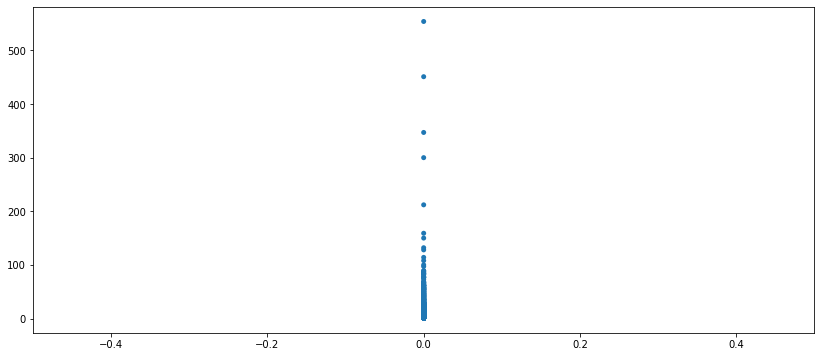

In [72]:
plt.figure(figsize=(14,6))
ax = sns.swarmplot(data = df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [71]:
df.groupby("reviewer_name").review_content.count()

reviewer_name
101poodles       7
151rum           1
17Beer          24
2OLD4BS         19
2mutchbeer41     2
                ..
zizzybalubba     5
zombywoof        1
zoucrew102      58
zvikar          15
zvsn            38
Name: review_content, Length: 2336, dtype: int64

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=)
plt.show()